# CS231a PSET 0

You can use this colab notebook to write your code in, which could save you the trouble of having to set up Python or installing packages.

# Problem 1: Basic Matrix/Vector Manipulation 

Once you fill out this code and get it working, save it to your p1.py file for submission to Gradescope.


Problem 2b:1
Problem 2c:[-1  2  0]
Problem 2d:[ 3  9 15  2]
Problem 2e:[[1 2 0]
 [4 5 0]
 [7 8 0]
 [0 2 0]]


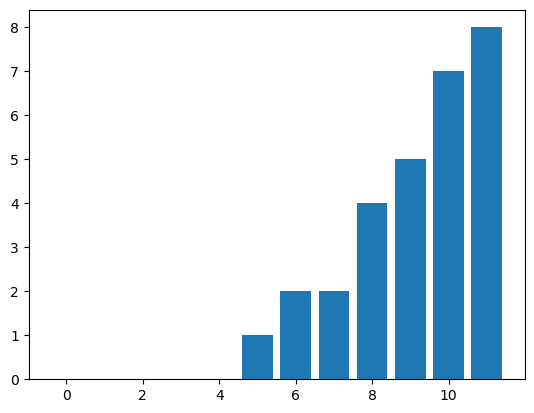

In [1]:
# CS231A Homework 0, Problem 1
import numpy as np
import matplotlib.pyplot as plt

def part_a():
    # ===== Problem 2a =====
    # Define and return Matrix M and Vectors a,b,c in Python with NumPy

    M, a, b, c = None, None, None, None

    # BEGIN YOUR CODE HERE
    M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
        [0, 2, 2]
    ])
    a = np.array([1, 1, 0]).T
    b = np.array([-1, 2, 5]).T
    c = np.array([0, 2, 3, 2]).T
    # END YOUR CODE HERE

    return M, a, b, c
    
def part_b(a, b):
    # ===== Problem 2b =====
    # Find the dot product of vectors a and b, save the value to aDotb

    aDotb = None

    # BEGIN YOUR CODE HERE
    aDotb = np.dot(a, b)
    # END YOUR CODE HERE

    return aDotb

def part_c(a, b):    
    # ===== Problem 2c =====
    # Find the element-wise product of a and b
    
    aProdb = None
    
    # BEGIN YOUR CODE HERE
    aProdb = np.multiply(a, b)
    # END YOUR CODE HERE

    return aProdb

def part_d(a, b, M):    
    # ===== Problem 2d =====
    # Find (a^T b)Ma
    
    result = None
    
    # BEGIN YOUR CODE HERE
    result = np.dot(a, b)*np.dot(M, a)
    # END YOUR CODE HERE

    return result

def part_e(a, M):
    # ===== Problem 2e =====
    # Without using a loop, multiply each row of M element-wise by a.
    # Hint: The function tile() may come in handy.

    newM = None

    # BEGIN YOUR CODE HERE
    newM = np.multiply(np.tile(a.T, (4, 1)), M)
    # END YOUR CODE HERE

    return newM

def part_f(M):
    # ===== Problem 2f =====
    # Without using a loop, sort all of the values
    # of M in increasing order and plot them.
    
    sortedM = None
    
    # BEGIN YOUR CODE HERE
    sortedM = np.sort((np.ravel(M)))
    # END YOUR CODE HERE
    
    plt.bar(range(12), np.squeeze(list(sortedM)))
    return sortedM

if __name__ == '__main__':
    M, a, b, c = part_a()
    aDotb = part_b(a,b)
    print("Problem 2b:%s"%str(aDotb))
    mult = part_c(a,b)
    print("Problem 2c:%s"%str(mult))
    ans = part_d(a,b,M)
    print("Problem 2d:%s"%str(ans))
    newM = part_e(a,M)
    print("Problem 2e:%s"%str(newM))
    part_f(newM)


# Problem 2: Basic Image Manipulations 


Now, you can fill out the logic for this problem. Once done, copy it to p2.py for submission to Gradescope.

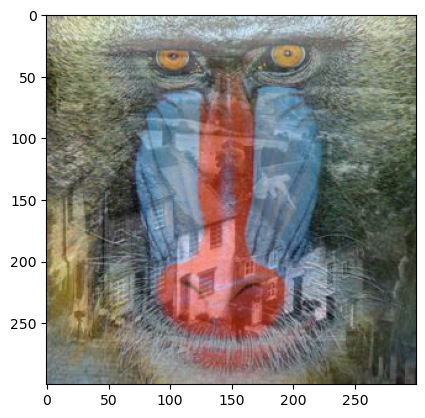

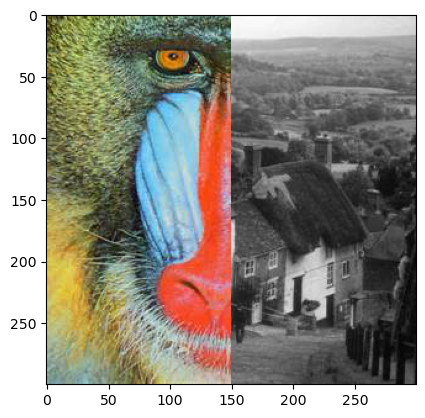

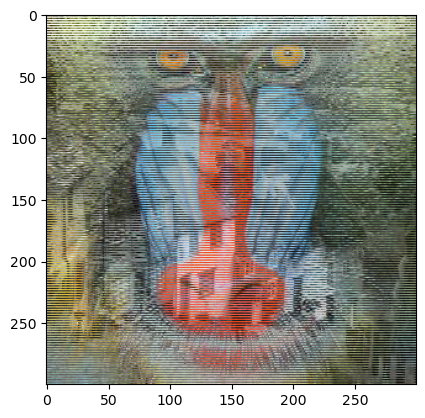

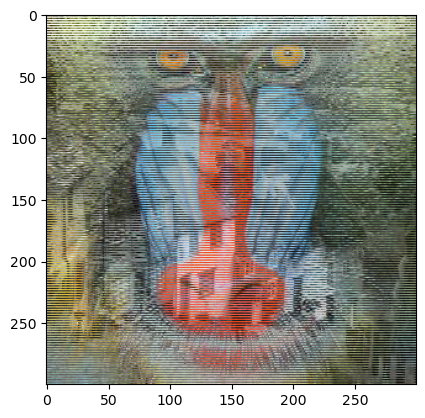

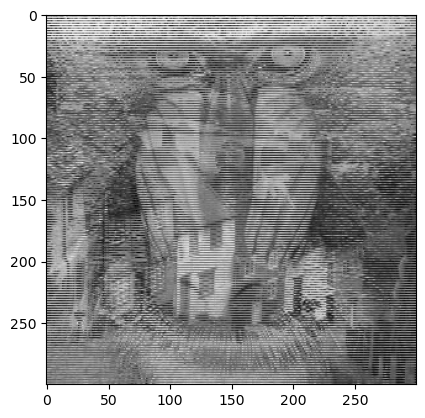

In [2]:
# CS231A Homework 0, Problem 2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def part_a():
    # ===== Problem 3a =====
    # Read in the images, image1.jpg and image2.jpg, as color images.
    # Hint: use io.imread to read in the files

    img1, img2 = None, None

    # BEGIN YOUR CODE HERE
    img1 = io.imread('./image1.jpg')
    img2 = io.imread('./image2.jpg')
    # END YOUR CODE HERE

    return img1, img2

def normalize_img(img):
    # TODO implement this helper function for parts b and c
    rgbmax = np.max(img, axis=(0, 1))   # (3,) for RGB
    rgbmin = np.min(img, axis=(0, 1))   # (3,) for RGB
    # use Min-Max Normalization
    return (img - rgbmin) / (rgbmax - rgbmin)

def part_b(img1, img2):
    # ===== Problem 3b =====
    # Convert the images to double precision and rescale them
    # to stretch from minimum value 0 to maximum value 1.

    # BEGIN YOUR CODE HERE
    img1 = img1.astype('float64')
    img2 = img2.astype('float64')

    img1 = normalize_img(img1)
    img2 = normalize_img(img2)
    # END YOUR CODE HERE

    return img1, img2

def part_c(img1, img2):
    # ===== Problem 3c =====
    # Add the images together and re-normalize them
    # to have minimum value 0 and maximum value 1.
    # Display this image.
    sumImage = None

    # BEGIN YOUR CODE HERE
    sumImage = normalize_img(img1 + img2)
    # END YOUR CODE HERE

    plt.figure()
    plt.imshow(sumImage)
    return sumImage

def part_d(img1, img2):
    # ===== Problem 3d =====
    # Create a new image such that the left half of
    # the image is the left half of image1 and the
    # right half of the image is the right half of image2.
    newImage1 = None

    # BEGIN YOUR CODE HERE
    row = img1.shape[0]
    col = img1.shape[1]
    half = col // 2
    newImage1 = np.zeros((row, col, 3), dtype=np.float64)
    newImage1[:, :half, :] = img1[:, :half, :]
    newImage1[:, half:, :] = img2[:, half:, :]
    # END YOUR CODE HERE

    plt.figure()
    plt.imshow(newImage1)
    return newImage1

def part_e(img1, img2):
    # ===== Problem 3e =====
    # Using a for loop, create a new image such that every odd
    # numbered row is the corresponding row from image1 and the
    # every even row is the corresponding row from image2.
    # Hint: Remember that indices start at 0 and not 1 in Python.
    newImage2 = None

    # BEGIN YOUR CODE HERE
    row = img1.shape[0]
    col = img1.shape[1]
    newImage2 = np.zeros((row, col, 3), dtype=np.float64)
    for i in range(0, row, 2):
        newImage2[i, ...] = img2[i, ...]
    for i in range(1, row, 2):
        newImage2[i, ...] = img1[i, ...]
    # END YOUR CODE HERE

    plt.figure()
    plt.imshow(newImage2)
    return newImage2

def part_f(img1, img2):
    # ===== Problem 3f =====
    # Accomplish the same task as part e without using a for-loop.
    # The functions reshape and tile may be helpful here.
    newImage3 = None

    # BEGIN YOUR CODE HERE
    row = img1.shape[0]
    col = img1.shape[1]
    evenRowMask = np.concatenate((np.ones((1, col, 3)), np.zeros((1, col, 3))), axis=0)
    oddRowMask = np.concatenate((np.zeros((1, col, 3)), np.ones((1, col, 3))), axis=0)

    evenRowFilter = np.tile(oddRowMask, (row//2, 1, 1))
    oddRowFilter = np.tile(evenRowMask, (row//2, 1, 1))

    newImage3 = np.multiply(img1, evenRowFilter) + np.multiply(img2, oddRowFilter)
    # END YOUR CODE HERE

    plt.figure()
    plt.imshow(newImage3)
    return newImage3

def part_g(img):
    # ===== Problem 3g =====
    # Convert the result from part f to a grayscale image.
    # Display the grayscale image with a title.
    # Hint: use np.dot and the standard formula for converting RGB to grey
    # greyscale = R*0.299 + G*0.587 + B*0.114
    grayImage = None

    # BEGIN YOUR CODE HERE
    grayImage = img[..., 0] * 0.299 + img[..., 1] * 0.587 + img[..., 2] * 0.114
    # END YOUR CODE HERE

    plt.figure()
    plt.imshow(grayImage, cmap = plt.get_cmap('gray'))
    return img

if __name__ == '__main__':
    img1, img2 = part_a()
    img1, img2 = part_b(img1, img2)
    sumImage = part_c(img1, img2)
    newImage1 = part_d(img1, img2)
    newImage2 = part_e(img1, img2)
    newImage3 = part_f(img1, img2)
    grayImage = part_g(newImage3)

# Problem 3: Singular Value Decomposition

First, make sure you have already run the code block for having access to image files from Problem 2. Then, complete this code and then copy it to p3.py for submission to Gradescope.

In [ ]:
# CS231A Homework 0, Problem 3
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def low_rank_approx(rank, u, s, v):
    pass # we recommend you implement this helper function for parts b and c

def part_a():
    # ===== Problem 4a =====
    # Take the singular value decomposition of the image.

    img1 = io.imread('image1.jpg', as_gray=True)
    u, s, v = None, None, None

    # BEGIN YOUR CODE HERE

    # END YOUR CODE HERE
    
    return u, s, v

def part_b(u, s, v):
    # ===== Problem 4b =====
    # Save and display the best rank 1 approximation 
    # of the (grayscale) image1.
    rank1approx = None

    # BEGIN YOUR CODE HERE

    # END YOUR CODE HERE

    plt.figure()
    plt.imshow(rank1approx, cmap = plt.get_cmap('gray'))
    return rank1approx
    
def part_c(u, s, v):
    # ===== Problem 4c =====
    # Save and display the best rank 20 approximation
    # of the (grayscale) image1.
    rank20approx = None

    # BEGIN YOUR CODE HERE

    # END YOUR CODE HERE

    plt.figure()
    plt.imshow(rank20approx, cmap = plt.get_cmap('gray'))
    return rank20approx

if __name__ == '__main__':
    u, s, v = part_a()
    rank1approx = part_b(u, s, v)
    rank20approx = part_c(u, s, v)


That's it, you are done! Remember to submit your code file to Gradescope by zipping the .py files and uploading the zip file to the coding assignment.